In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the cleaned CC dataframe

In [4]:
# read in the cleaned CC dataframe
CC = pd.read_csv('../Data/CC_cleaned.csv')

# print the head of CC
print(CC.head())



    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  zip_cluster
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565       2474.0
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717       2124.0
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963       2184.0
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130       1949.0
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042       2139.0


In [20]:
# linear regression model to predict DOM. We want to use the following features:
# 'zip_cluster', 'BEDS', 'BATHS', 'SQFT', 'LOT_SQFT', 'ZIP', 'LATITUDE', 'LONGITUDE', SOLDPRICE

# first, we need to convert the categorical variable 'zip_cluster' to dummy variables
CC = pd.get_dummies(CC, columns=['zip_cluster'], prefix='zip_cluster')

# print the head of CC
print(CC.head())



    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565   
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717   
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963   
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130   
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042   

   zip_cluster_1420.0  ...  zip_cluster_2649.0  zip_cluster_2673.0  \
0               False  ...               False               False   
1               False  ...               False               False   
2               False  ...               False               False   
3               False  ...               False               False   
4               False  ...               False               False   

   zip_cluster_2703.0  zip_cluster_2718.0  zip_cluster_2720.0  \
0               False               False               False   
1               False             

In [21]:
# # count NaN values in each column
# print(CC.isna().sum())


# # count NaN values in each column
# print(CC.isna().sum())

# print rows with NaN values in any column
print(CC[CC.isna().any(axis=1)])

       ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM  lat  long  \
1901  2625   203000.0  2261     2    2.5   12   26  NaN   NaN   
2397  2031   130500.0  1503     2    2.5    2  103  NaN   NaN   
5451  2068   166000.0  1600     2    1.5   32  178  NaN   NaN   
7308  2425   599000.0  2400     3    2.5   34   26  NaN   NaN   
8237  2469   169000.0  2160     2    2.5    2  166  NaN   NaN   
8364  2154   400000.0  1900     2    1.5    5  112  NaN   NaN   

      zip_cluster_1420.0  ...  zip_cluster_2649.0  zip_cluster_2673.0  \
1901               False  ...               False               False   
2397               False  ...               False               False   
5451               False  ...               False               False   
7308               False  ...               False               False   
8237               False  ...               False               False   
8364               False  ...               False               False   

      zip_cluster_2703.0  zip_cl

In [22]:
# hard coded zips that are not in the pgeocode database
zip_lat_lon = {
    2625: (41.6485, -70.3475),
    2031: (42.1579, -71.1762),
    2068: (42.0248, -71.1022),
    2425: (42.3318, -71.1212),
    2469: (42.2965, -71.2921),
    2154: (42.3765, -71.2356)
}

# add the lat and long for the hard coded zips
for zip_code, (lat, long) in zip_lat_lon.items():
    CC.loc[CC['ZIP'] == zip_code, 'lat'] = lat
    CC.loc[CC['ZIP'] == zip_code, 'long'] = long

# print the head of CC
print(CC.head())




    ZIP  SOLDPRICE  SQFT  BEDS  BATHS  AGE  DOM      lat     long  \
0  2474   410000.0  1368     2    2.0    3  897  42.4202 -71.1565   
1  2124   327000.0  1850     2    2.5    5  658  42.2918 -71.0717   
2  2184   331000.0  1469     2    1.0   38  467  42.2093 -70.9963   
3  1949   580000.0  2945     2    2.5    4  565  42.5942 -71.0130   
4  2139  1000000.0  2536     3    2.5    3   56  42.3647 -71.1042   

   zip_cluster_1420.0  ...  zip_cluster_2649.0  zip_cluster_2673.0  \
0               False  ...               False               False   
1               False  ...               False               False   
2               False  ...               False               False   
3               False  ...               False               False   
4               False  ...               False               False   

   zip_cluster_2703.0  zip_cluster_2718.0  zip_cluster_2720.0  \
0               False               False               False   
1               False             

In [23]:
# now we can fit a linear regression model to predict DOM
# we will use all the features except for the ZIP code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# split the data into training and testing sets
X = CC.drop(columns=['DOM'])
y = CC['DOM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)




In [24]:
# print mse
print(f'Mean Squared Error: {mse}')

# print r2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')





Mean Squared Error: 6047.383839647907
R2 Score: -0.030245688624526812


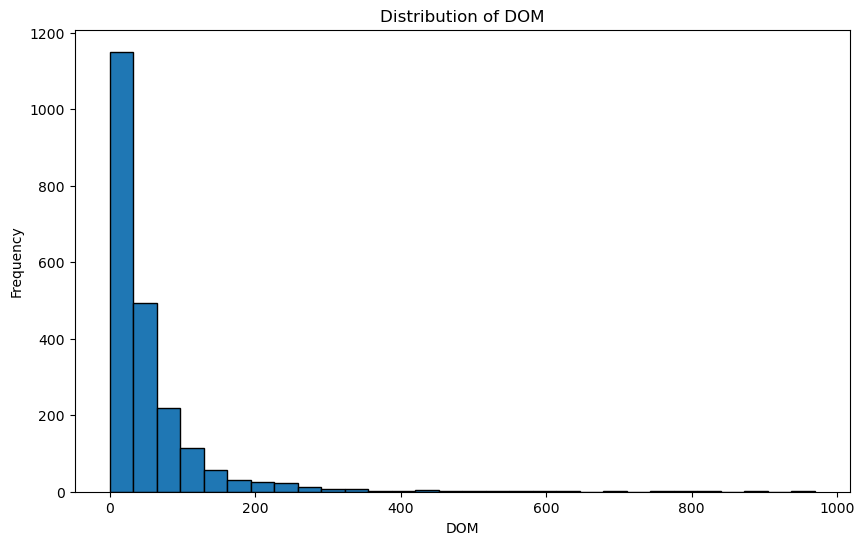

In [25]:
# show the distribution of DOM 
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, edgecolor='k')
plt.title('Distribution of DOM')
plt.xlabel('DOM')
plt.ylabel('Frequency')
plt.show()




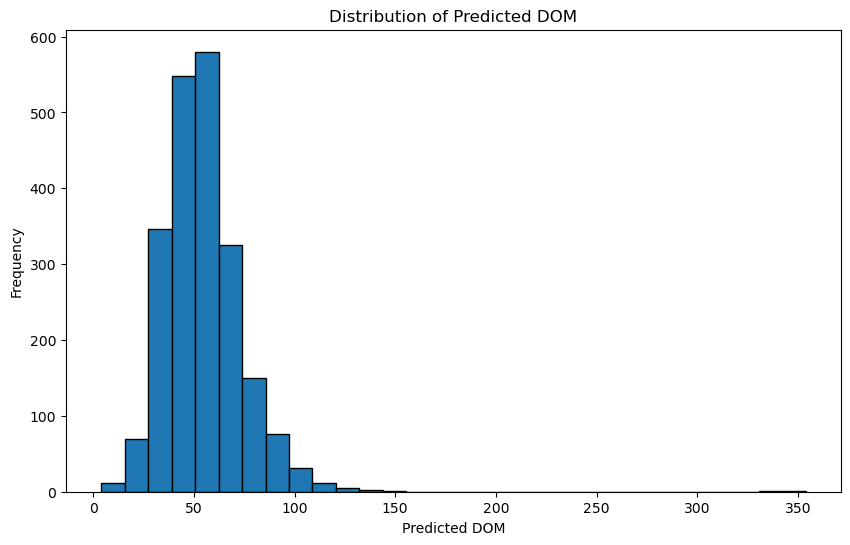

In [27]:
# distibution of predicted DOM
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, edgecolor='k')
plt.title('Distribution of Predicted DOM')
plt.xlabel('Predicted DOM')
plt.ylabel('Frequency')
plt.show()



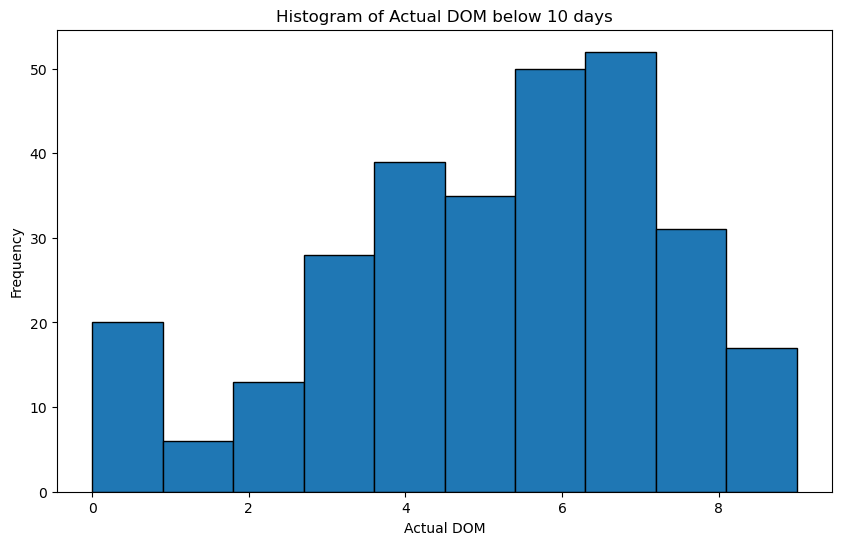

DOM
7    52
6    50
4    39
5    35
8    31
3    28
0    20
9    17
2    13
1     6
Name: count, dtype: int64


In [30]:
# histogram of actual DOM below 10 days with 1 day bins
plt.figure(figsize=(10, 6))
plt.hist(y_test[y_test < 10], bins=10, edgecolor='k')
plt.title('Histogram of Actual DOM below 10 days')
plt.xlabel('Actual DOM')
plt.ylabel('Frequency')
plt.show()

# value counts of actual DOM where DOM is less than 10 days
print(y_test[y_test < 10].value_counts())




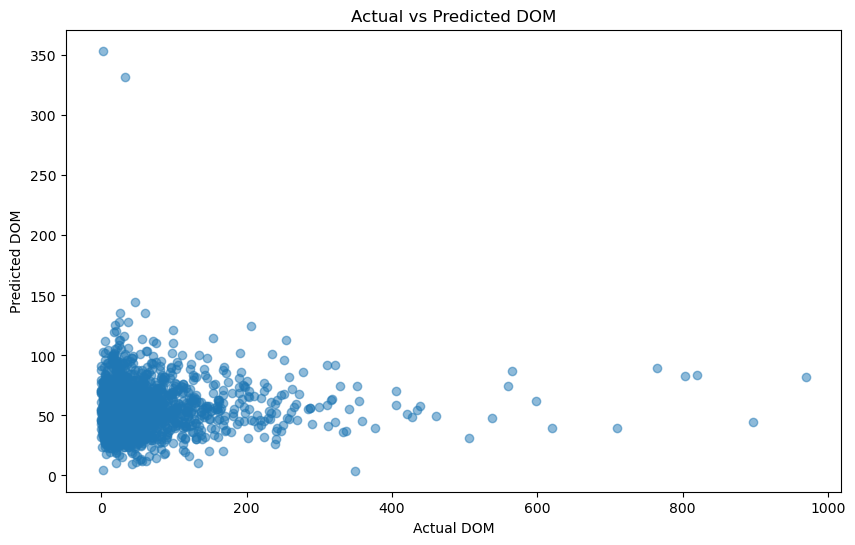

In [26]:
# overlay the actual and predicted DOM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted DOM')
plt.xlabel('Actual DOM')
plt.ylabel('Predicted DOM')
plt.show()




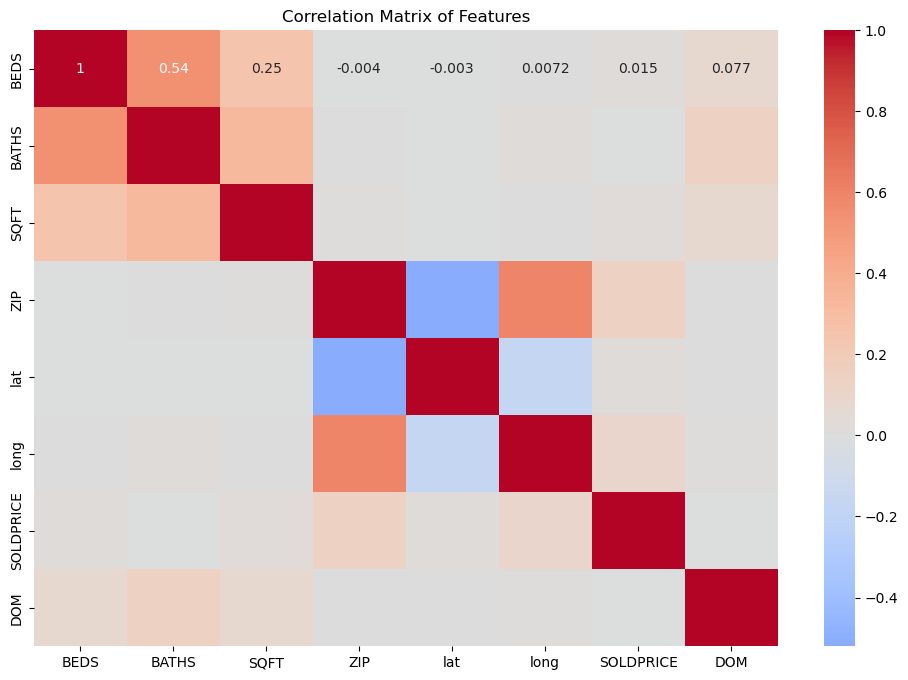

In [39]:
# get the correlation matrix of the features 'BEDS', 'BATHS', 'SQFT', 'ZIP', 'LATITUDE', 'LONGITUDE', SOLDPRICE and 'DOM' from the Y_train data

corr_matrix = CC[['BEDS', 'BATHS', 'SQFT', 'ZIP', 'lat', 'long', 'SOLDPRICE', 'DOM']].corr()
# plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()



In [40]:
# baselines of predicting the mean and the median
# calculate the mean of the DOM
mean_dom = y_test.mean()
print(f'Mean of DOM: {mean_dom}')

# calculate the median of the DOM
median_dom = y_test.median()
print(f'Median of DOM: {median_dom}')

# calculate the MSE of the mean and median
mse_mean = mean_squared_error(y_test, [mean_dom] * len(y_test))
mse_median = mean_squared_error(y_test, [median_dom] * len(y_test))
print(f'MSE of Mean: {mse_mean}')
print(f'MSE of Median: {mse_median}')





Mean of DOM: 54.0
Median of DOM: 29.0
MSE of Mean: 5869.846296296297
MSE of Median: 6494.846296296297


                  mean  count
zip_cluster                  
2482.0       32.083333     12
1550.0       32.000000     22
2121.0       31.700000     10
2464.0       31.520000     25
2188.0       29.000000     10
1609.0       28.809524     21
2461.0       28.307692     13
1887.0       27.769231     13
2492.0       27.090909     11
2054.0       26.833333     12


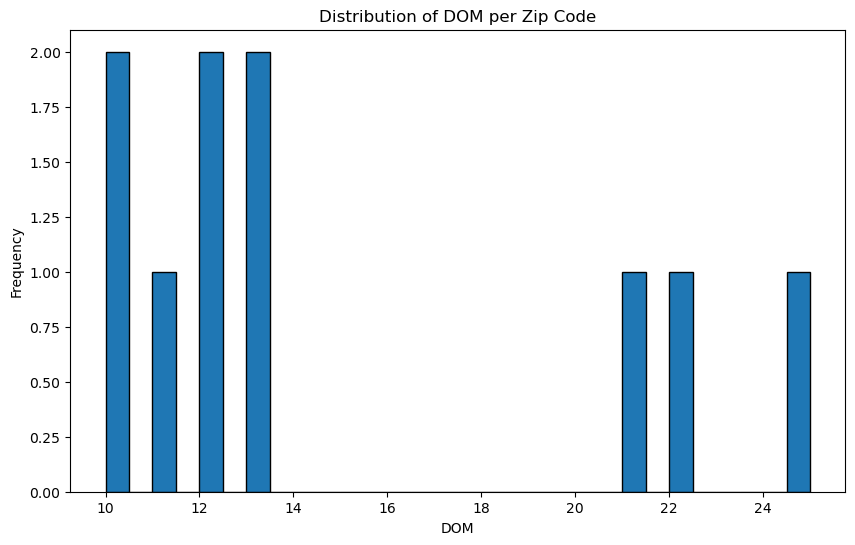

In [11]:
# days on market per zip code
# group by zip_cluster and calculate the mean of the DOM and show count of properties per zip code, show top 10 highest DOM
dom_per_zip = CC.groupby('zip_cluster')['DOM'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).tail(10)
print(dom_per_zip)

# show distribution of above data
plt.figure(figsize=(10, 6))
plt.hist(dom_per_zip['count'], bins=30, edgecolor='k')
plt.title('Distribution of DOM per Zip Code')
plt.xlabel('DOM')
plt.ylabel('Frequency')
plt.show()




